In [1]:
import requests
import pandas as pd
import sys, json
import json
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

url="https://archive.org/advancedsearch.php?q=pneumonia+OR+cough+OR+diarrhea&output=json&rows=500000"

In [2]:
response = requests.get(url).json()

In [3]:
response

{'responseHeader': {'status': 0,
  'QTime': 443,
  'params': {'query': '( (title:pneumonia^100 OR salients:pneumonia^50 OR subject:pneumonia^25 OR description:pneumonia^15 OR collection:pneumonia^10 OR language:pneumonia^10 OR text:pneumonia^1) OR (title:cough^100 OR salients:cough^50 OR subject:cough^25 OR description:cough^15 OR collection:cough^10 OR language:cough^10 OR text:cough^1) OR (title:diarrhea^100 OR salients:diarrhea^50 OR subject:diarrhea^25 OR description:diarrhea^15 OR collection:diarrhea^10 OR language:diarrhea^10 OR text:diarrhea^1) )',
   'qin': 'pneumonia OR cough OR diarrhea',
   'fields': '_default_',
   'wt': 'json',
   'rows': '500000',
   'start': 0}},
 'response': {'numFound': 18911,
  'start': 0,
  'docs': [{'backup_location': 'ia906101_12',
    'collection': ['TV-WNCN', 'tvarchive', 'tvnews'],
    'contributor': 'WNCN',
    'date': '2016-03-04T00:00:00Z',
    'description': 'Local and national news, weather and sports.',
    'downloads': 32,
    'format': [

In [4]:
response['response']['docs'][1]['publicdate']

'2017-11-02T05:14:53Z'

In [5]:
dates = [""]*9999
for count,row in enumerate(response['response']['docs']):
    try:
        dates[count]=row['publicdate']
    except:
        try:
            dates[count]=row['date']
        except:
            pass


In [6]:
dates

['2016-03-04T07:02:00Z',
 '2017-11-02T05:14:53Z',
 '2020-03-08T10:16:56Z',
 '2019-05-08T23:51:15Z',
 '2019-08-05T14:11:25Z',
 '2020-10-22T13:19:34Z',
 '2020-10-22T13:32:04Z',
 '2019-04-27T22:08:16Z',
 '2020-02-06T23:34:13Z',
 '2013-06-06T02:40:18Z',
 '2014-12-17T12:29:57Z',
 '2019-05-07T14:28:31Z',
 '2015-06-18T21:55:12Z',
 '2015-06-18T22:36:35Z',
 '2016-09-22T07:37:00Z',
 '2018-07-20T15:50:03Z',
 '2017-09-06T12:59:36Z',
 '2015-03-21T09:08:35Z',
 '2013-02-26T21:26:43Z',
 '2017-11-01T08:14:22Z',
 '2017-10-08T05:09:28Z',
 '2016-06-29T10:02:30Z',
 '2019-07-20T04:36:49Z',
 '2016-03-07T07:03:00Z',
 '2018-02-25T22:55:24Z',
 '2019-05-03T07:08:06Z',
 '2018-01-23T18:31:42Z',
 '2016-10-21T06:37:00Z',
 '2019-11-07T14:01:47Z',
 '2018-06-13T02:26:41Z',
 '2018-01-18T13:16:19Z',
 '2016-11-17T07:00:00Z',
 '2020-02-26T04:05:00Z',
 '2012-03-08T21:00:00Z',
 '2012-04-30T22:39:19Z',
 '2017-08-14T03:17:28Z',
 '2017-03-12T21:09:02Z',
 '2019-01-29T05:11:36Z',
 '2019-01-01T09:25:27Z',
 '2019-01-03T05:52:39Z',


In [7]:
dates = [x for x in dates if x]

In [8]:
dates = [x for x in dates if str(dates[0]) != "0"]

In [9]:
dates

['2016-03-04T07:02:00Z',
 '2017-11-02T05:14:53Z',
 '2020-03-08T10:16:56Z',
 '2019-05-08T23:51:15Z',
 '2019-08-05T14:11:25Z',
 '2020-10-22T13:19:34Z',
 '2020-10-22T13:32:04Z',
 '2019-04-27T22:08:16Z',
 '2020-02-06T23:34:13Z',
 '2013-06-06T02:40:18Z',
 '2014-12-17T12:29:57Z',
 '2019-05-07T14:28:31Z',
 '2015-06-18T21:55:12Z',
 '2015-06-18T22:36:35Z',
 '2016-09-22T07:37:00Z',
 '2018-07-20T15:50:03Z',
 '2017-09-06T12:59:36Z',
 '2015-03-21T09:08:35Z',
 '2013-02-26T21:26:43Z',
 '2017-11-01T08:14:22Z',
 '2017-10-08T05:09:28Z',
 '2016-06-29T10:02:30Z',
 '2019-07-20T04:36:49Z',
 '2016-03-07T07:03:00Z',
 '2018-02-25T22:55:24Z',
 '2019-05-03T07:08:06Z',
 '2018-01-23T18:31:42Z',
 '2016-10-21T06:37:00Z',
 '2019-11-07T14:01:47Z',
 '2018-06-13T02:26:41Z',
 '2018-01-18T13:16:19Z',
 '2016-11-17T07:00:00Z',
 '2020-02-26T04:05:00Z',
 '2012-03-08T21:00:00Z',
 '2012-04-30T22:39:19Z',
 '2017-08-14T03:17:28Z',
 '2017-03-12T21:09:02Z',
 '2019-01-29T05:11:36Z',
 '2019-01-01T09:25:27Z',
 '2019-01-03T05:52:39Z',


In [10]:
lastdates=len(dates)
newdates=0
while (newdates != lastdates):
    lastdates=newdates
    for i,row in enumerate(dates):    
        if dates[i][:4] < '2018':
            del dates[i]
            newdates=len(dates)

In [11]:
len(dates)

4662

In [12]:
min(dates)

'2018-01-01T03:45:06Z'

In [13]:
max(dates)

'2021-10-01T03:00:34Z'

In [14]:
df = pd.DataFrame(dates)
#df = df.value_counts().sort_index()

In [15]:
df[0] = pd.to_datetime(df[0], dayfirst=True)

df1 = df[0].dt.date.value_counts().sort_index().reset_index()

df1.columns = ['DATE','Count']

In [16]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [17]:
df1.set_index('DATE', inplace=True)

In [18]:
df1

Count
DATE             
2018-01-01     13
2018-01-02     13
2018-01-03      5
2018-01-04      6
2018-01-05      9
...           ...
2021-09-25      1
2021-09-27      1
2021-09-28      1
2021-09-29      1
2021-10-01      1

[1072 rows x 1 columns]

In [19]:
print (df1.index)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-09-14', '2021-09-16', '2021-09-18', '2021-09-22',
               '2021-09-24', '2021-09-25', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-10-01'],
              dtype='datetime64[ns]', name='DATE', length=1072, freq=None)


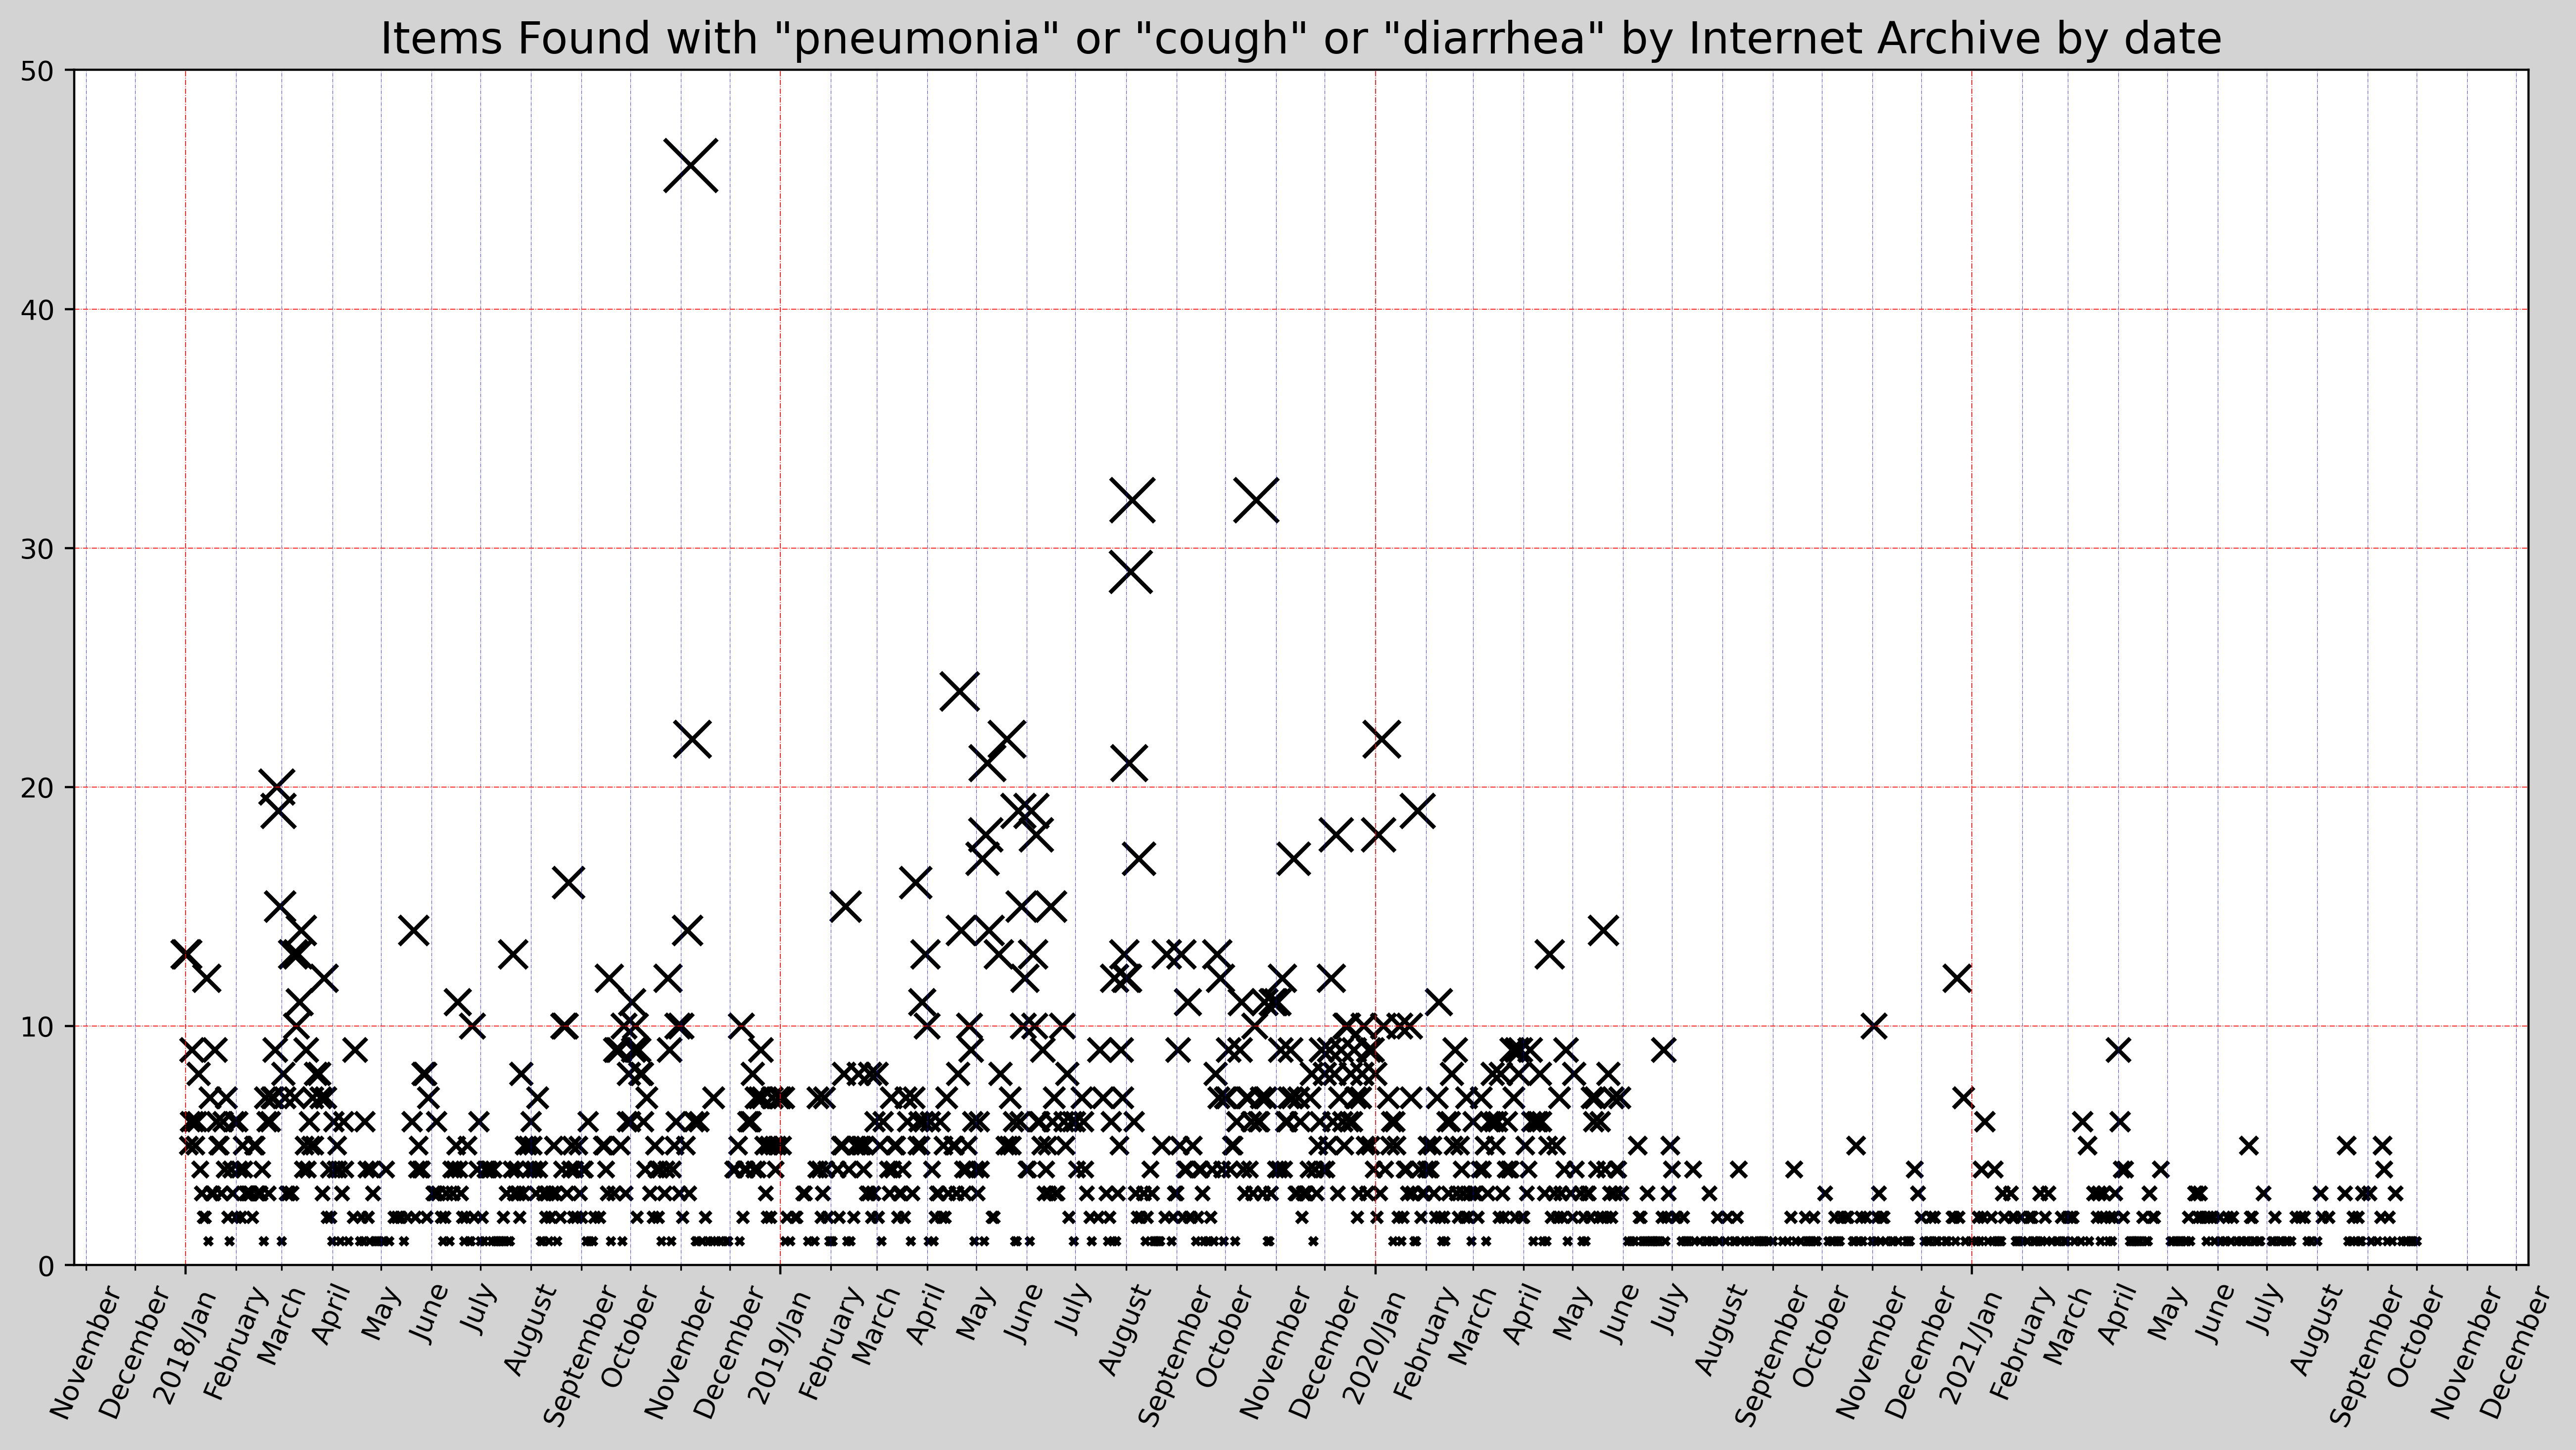

In [20]:
x = df1.index

y = df1['Count']

fig= plt.figure(figsize=(16, 8), dpi=400,facecolor='lightgray')

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(x,y,s=y*8,marker='x',color='k')
plt.gca().grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
plt.gca().grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
plt.ylim(top=50,bottom=0)
plt.title('Items Found with "pneumonia" or "cough" or "diarrhea" by Internet Archive by date',size=16)

plt.show()
plt.close()

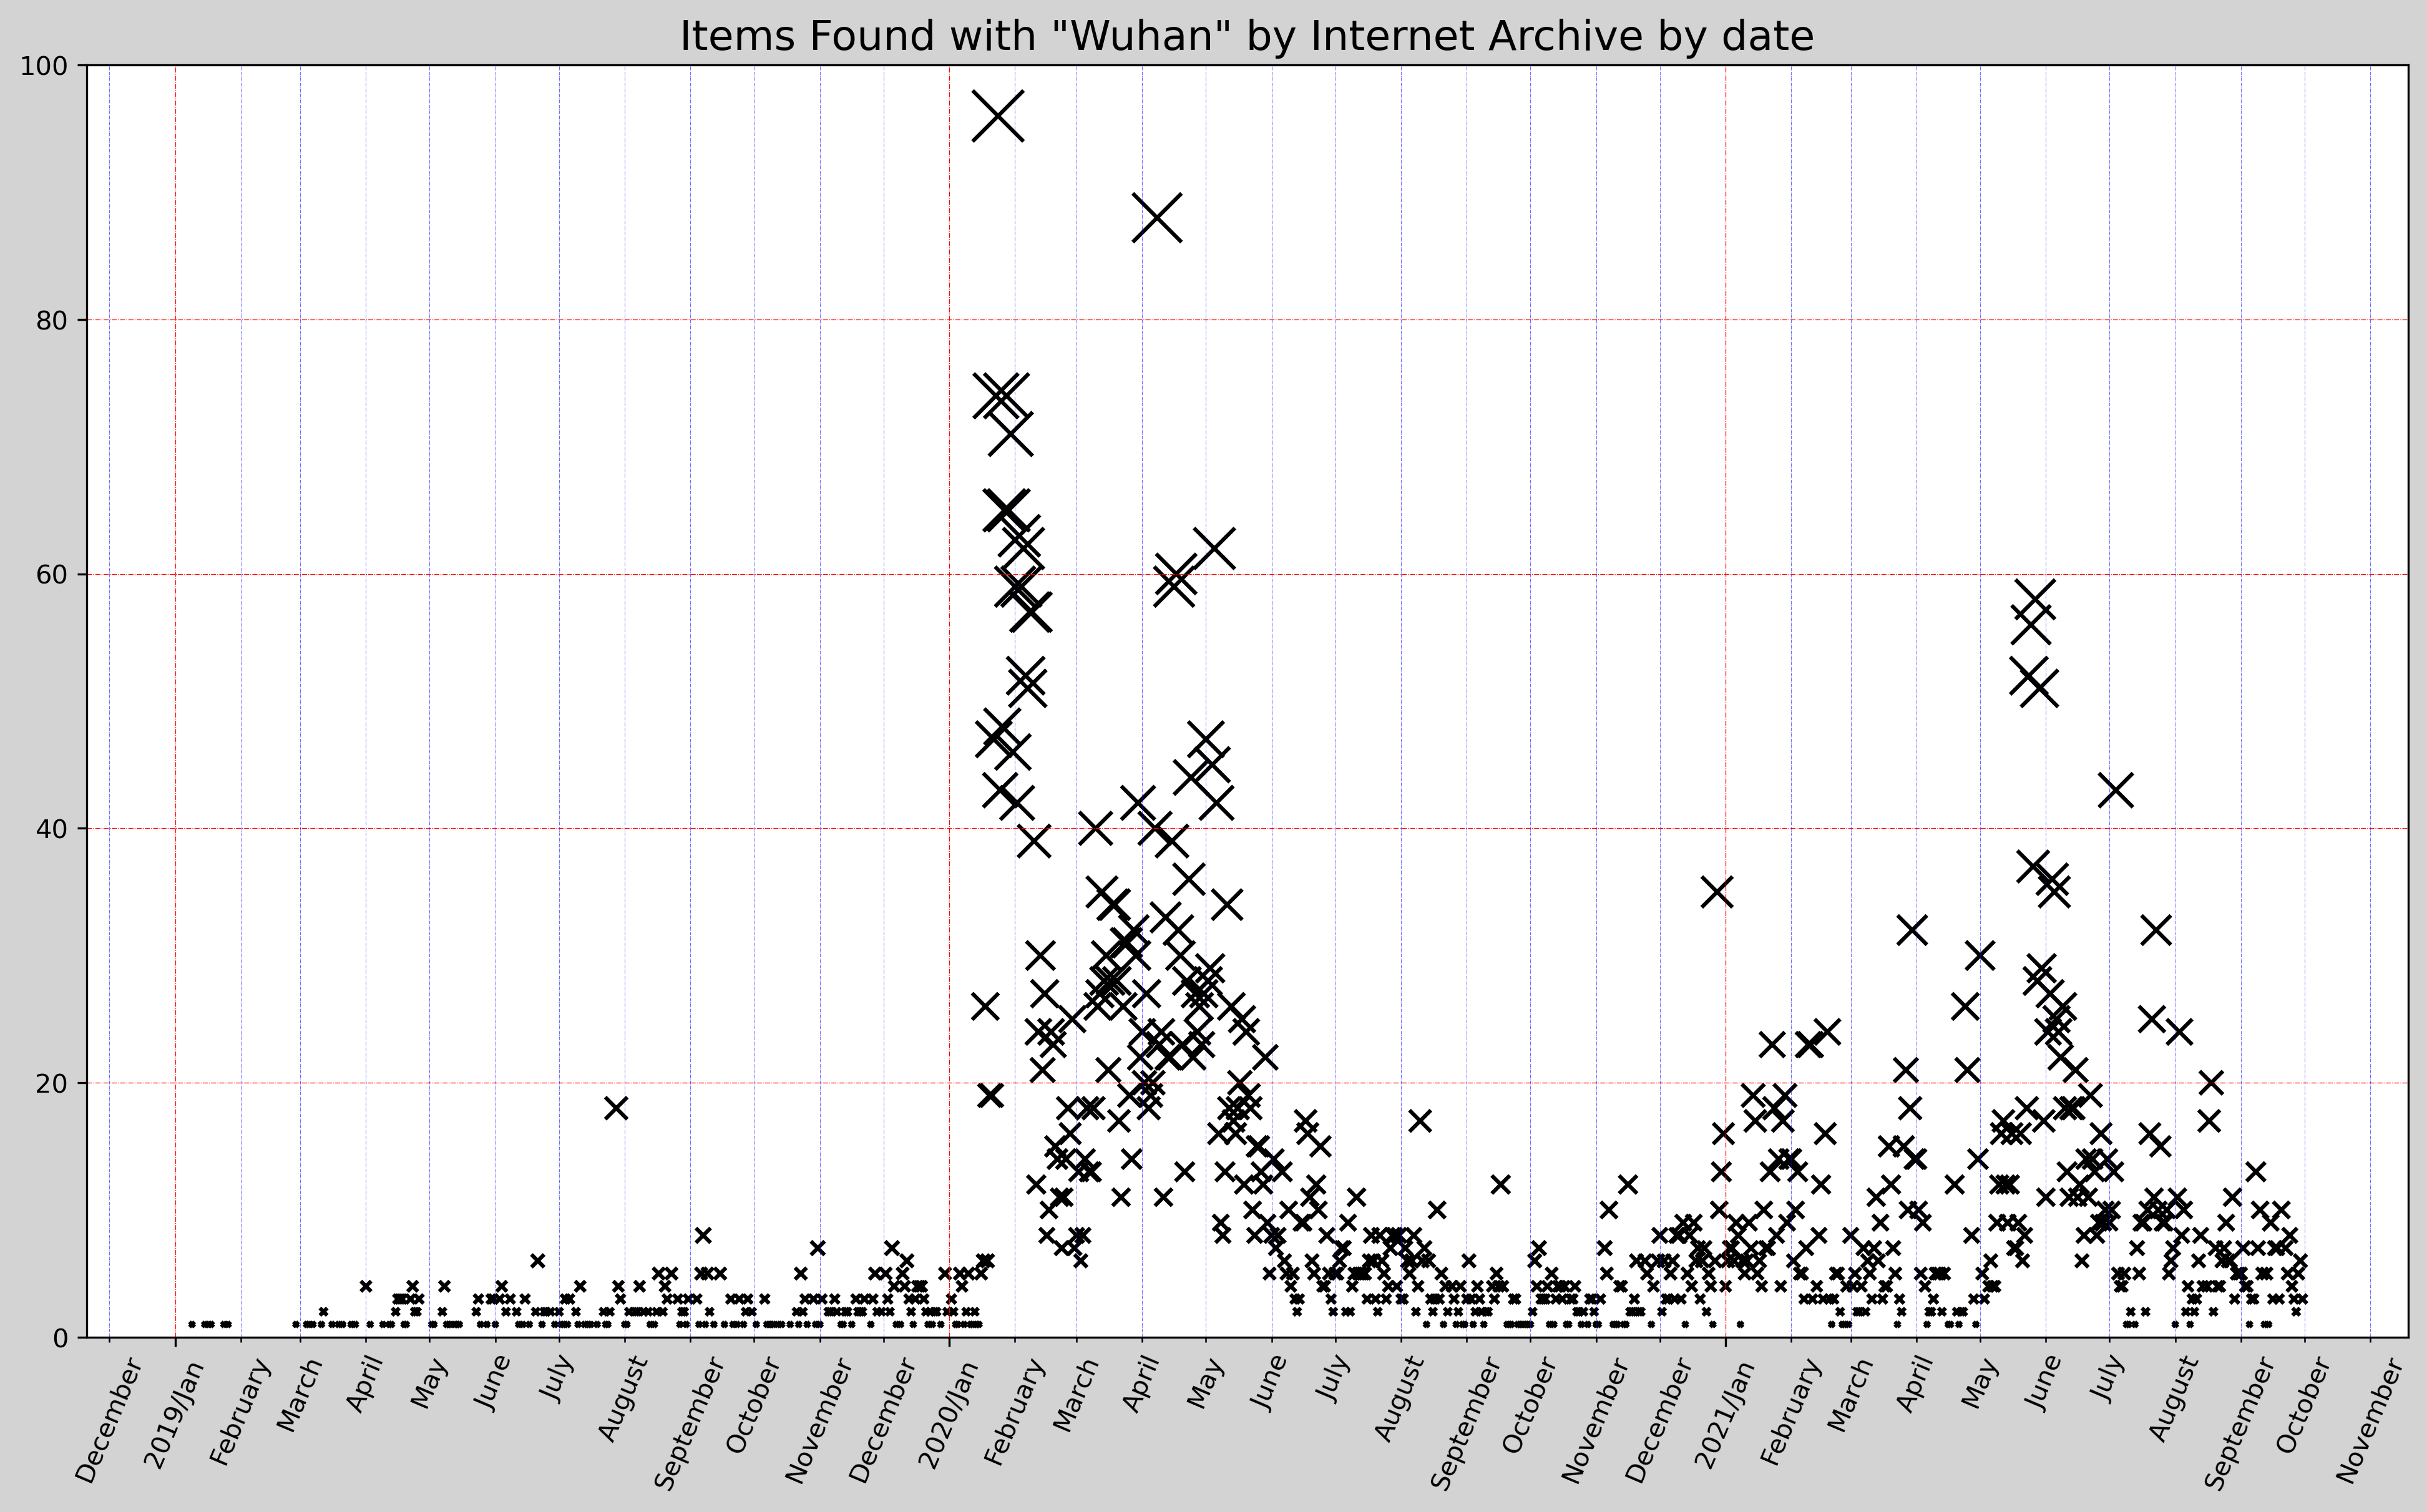

In [1108]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

fig = plt.figure(figsize=(16, 9), dpi=300,facecolor='lightgray')
ax=  fig.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis="x", which="both", rotation=67)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
ax.grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
ax.set_ylim(top=100,bottom=0)

plt.title('Items Found with "Wuhan" by Internet Archive by date',size=16)

rows = []
a = 0
camera = Camera(fig)
for i,row in df1.iterrows():
    rows=df1[:i]
    ax.scatter(rows['Count'].index,rows['Count'],s=rows['Count']*4,marker='x',color='k')
    camera.snap()

anim = camera.animate(blit=False)

anim.save('scatter.gif',fps=60)

plt.show()
plt.close()